### Erster Versuch: Visualisierung 'Kreisradar'

Benötigte Bibliotheken:

In [1]:
import pandas as pd
import numpy as np
import dash
import plotly
import pickle

In [2]:
# Einlesen der Daten 
data = pd.read_pickle('../Data/data.pkl')

In [3]:
data

,Verwendungszweck,Zusageobligo,SDG 1,1.1,1.2,1.3,1.4,1.5,1.A,1.B,...,17.10,17.11,17.12,17.13,17.14,17.15,17.16,17.17,17.18,17.19
0,Abfallvermeidung,1.834510e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abfallvorbehandlung,5.874000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abfallwirtschaft,3.824088e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abluftanlage gem. Prog.Merkb.,4.493885e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abwasserentsorgung,3.065568e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Abwasserreinigung und -behandlung, Kläranlagen",1.068500e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Abwasservermeidung,1.652900e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Altenpflege- und Behinderteneinr.,1.690313e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Altlastensanierung,8.500000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Anlage zur Erzeugung von Biogas,1.142000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Wir ersetzen die NaNs durch 0, damit wir Rechenoperationen an der Tabelle durchführen können.

In [4]:
data = data.fillna(0)

In [5]:
data

,Verwendungszweck,Zusageobligo,SDG 1,1.1,1.2,1.3,1.4,1.5,1.A,1.B,...,17.10,17.11,17.12,17.13,17.14,17.15,17.16,17.17,17.18,17.19
0,Abfallvermeidung,1.834510e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abfallvorbehandlung,5.874000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Abfallwirtschaft,3.824088e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abluftanlage gem. Prog.Merkb.,4.493885e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Abwasserentsorgung,3.065568e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"Abwasserreinigung und -behandlung, Kläranlagen",1.068500e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Abwasservermeidung,1.652900e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Altenpflege- und Behinderteneinr.,1.690313e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Altlastensanierung,8.500000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Anlage zur Erzeugung von Biogas,1.142000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Wie in der Excel Datai angegeben, brauchen wir noch die Summen pro Spalte bzw. das Gesamtvolumen pro SDG über alle Verwendungszwecke.

In [6]:
sums = data.iloc[: ,1:188].apply(sum, axis = 0) # Anwendung der Funktion sum auf alle Spalten bis auf Verwendungszweck

In [7]:
sums_df = pd. DataFrame(sums).T # Überführung in ein DataFrame (optional)

Da wir keine Unterpunkte, sondern nur SDG1 bis SDG17 benötigen, filtern wir diese raus.

In [8]:
sums_df.columns

Index(['Zusageobligo', 'SDG 1', '1.1', '1.2', '1.3', '1.4', '1.5', '1.A',
       '1.B', 'SDG 2',
       ...
       '17.10', '17.11', '17.12', '17.13', '17.14', '17.15', '17.16', '17.17',
       '17.18', '17.19'],
      dtype='object', length=187)

In [9]:
# Bildung einer Liste mit den SDG Namen, auch manuell möglich oder in List Comprehension
sdgs = []

for col in sums_df.columns:
    if 'SDG' in str(col):
        sdgs.append(col)

In [10]:
sdgs

['SDG 1',
 'SDG 2',
 'SDG 3',
 'SDG 4',
 'SDG 5',
 'SDG 6',
 'SDG 7',
 'SDG 8',
 'SDG 9',
 'SDG 10',
 'SDG 11',
 'SDG 12',
 'SDG 13',
 'SDG 14',
 'SDG 15',
 'SDG 16',
 'SDG 17']

Nun können wir eine Subtabelle/ Array bilden, welche nur die Summen über die 17 SDGs enthält.

In [11]:
sdg = sums_df[sdgs]

In [12]:
sdg_sums = (sdg.T).rename(columns={0: 'sum'})
sdg_sums

,sum
SDG 1,0.000000e+00
SDG 2,0.000000e+00
SDG 3,0.000000e+00
SDG 4,4.422628e+08
SDG 5,0.000000e+00
SDG 6,5.187259e+08
SDG 7,2.440573e+10
SDG 8,4.620451e+08
SDG 9,1.547605e+09
SDG 10,4.414599e+08


Laut KfW soll der höchste Wert eines SDGs auf 100% abgebildet werden.

In [13]:
def mapping(x):
    y = []
    for i in list(x):
        if i == x.max():
            i=100
        else:
            i=round(i/x.max()*100,2)
        y.append(i)
    return y

In [14]:
sdg_sums['mapping'] = mapping(sdg_sums['sum'])

In [15]:
sdg_sums

,sum,mapping
SDG 1,0.000000e+00,0.00
SDG 2,0.000000e+00,0.00
SDG 3,0.000000e+00,0.00
SDG 4,4.422628e+08,1.81
SDG 5,0.000000e+00,0.00
SDG 6,5.187259e+08,2.13
SDG 7,2.440573e+10,100.00
SDG 8,4.620451e+08,1.89
SDG 9,1.547605e+09,6.34
SDG 10,4.414599e+08,1.81


In [42]:
from PIL import Image
img = Image.open("C:/Users/frik/Pictures/kfw2.PNG")


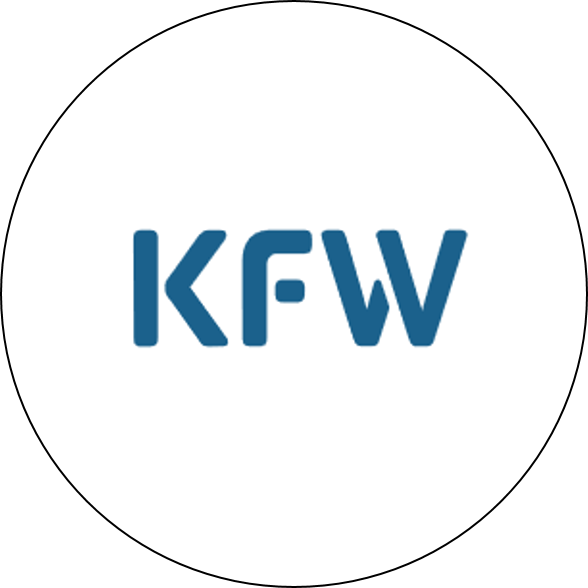

In [54]:
import plotly.graph_objects as go

fig = go.Figure(go.Barpolar(dr=0.3,
    r=[4, 3.5 ,3.5, 3.5, 3.5, 3.5, 10, 10, 4.5, 3.5, 10, 3.5, 10, 3.5, 3.5, 3.5, 4],
    theta=[360/17*(x+1) for x in range(17)],
    width=[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
    hoverinfo = 'text',
   
    marker_color=['rgb(229, 36, 59)',
'rgb(221, 166, 58)',
'rgb(76, 159, 56)',
'rgb(197, 25, 45)',
'rgb(255, 58, 33)',
'rgb(38, 189, 226)',
'rgb(252, 195, 11)',
'rgb(162, 25, 66)',
'rgb(253, 105, 37)',
'rgb(221, 19, 103)',
'rgb(253, 157, 36)',
'rgb(191, 139, 46)',
'rgb(63, 126, 68)',
'rgb(10, 151, 217)',
'rgb(86, 192, 43)',
'rgb(0, 104, 157)',
'rgb(25, 72, 106)'

],
    
    text=['No Poverty',
'Zero Hunger', 
'Good Health and Well-being',
'Quality Education', 
'Gender Equality', 
'Clean Water and Sanitation', 
'Affordable and Clean Energy', 
'Decent Work and Economic Growth', 
'Industry, Innovation and Infrastructure', 
'Reduced Inequality', 
'Sustainable Cities and Communities', 
'Responsible Consumption and Production', 
'Climate Action', 
'Life Below Water', 
'Life on Land', 
'Peace and Justice Strong Institutions', 
'Partnerships to achieve the Goal' ]
))

fig.update_layout(
    template=None,
    width=600, 
    height=600,
    title='KfW SDG contribution - new commitment volume year 2018',
    font_size=14,
    legend_font_size=14,
    hoverlabel_align = "right",
    #polar_radialaxis_ticksuffix='%',
    #polar_angularaxis_rotation=5,
    polar_angularaxis_direction="clockwise",
    polar = dict(
        radialaxis = dict(range=[0, 5], showticklabels=False, ticks='', color = 'white'),
        angularaxis = dict(showticklabels=False, ticks='', color = 'white'),
     
    )
)







#fig.add_shape(
#        dict(
##            type="circle",
#            fillcolor= "white",
#            layer ="above",
#             xref="paper", yref="paper",
#             x0= 0.25,
#             x1= 0.25,
#             y0=0.55,
#             y1 = 0.55,
#            line=dict(
#                color="white",
#                width=0.25
#            )
#))
                     
fig.add_layout_image(dict(source= img,
                         xref="paper", yref="paper",
                          layer="above",
                          yanchor="top",
                         sizex=0.45, sizey=0.45,
                          x= 0.28,
                          y=0.72,
                         ))
                                           
               
fig.show()




In [18]:
import plotly.graph_objects as go

labels = ['No Poverty',
'Zero Hunger', 
'Good Health and Well-being',
'Quality Education', 
'Gender Equality', 
'Clean Water and Sanitation', 
'Affordable and Clean Energy', 
'Decent Work and Economic Growth', 
'Industry, Innovation and Infrastructure', 
'Reduced Inequality', 
'Sustainable Cities and Communities', 
'Responsible Consumption and Production', 
'Climate Action', 
'Life Below Water', 
'Life on Land', 
'Peace and Justice Strong Institutions', 
'Partnerships to achieve the Goal']

values = sdg_sums['mapping']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values, 
                             hole=.5, 
                             hoverinfo = 'text',
                             marker_colors=['rgb(229, 36, 59)',
'rgb(221, 166, 58)',
'rgb(76, 159, 56)',
'rgb(197, 25, 45)',
'rgb(255, 58, 33)',
'rgb(38, 189, 226)',
'rgb(252, 195, 11)',
'rgb(162, 25, 66)',
'rgb(253, 105, 37)',
'rgb(221, 19, 103)',
'rgb(253, 157, 36)',
'rgb(191, 139, 46)',
'rgb(63, 126, 68)',
'rgb(10, 151, 217)',
'rgb(86, 192, 43)',
'rgb(0, 104, 157)',
'rgb(25, 72, 106)'

])])

fig.update_traces(hoverinfo='label', textinfo='none')
fig.update(layout_title_text='KfW SDG contribution - new commitment volume year 2018',
           layout_showlegend=False)

fig.update_layout(
    font_size=16
    )

fig.show()


### Versuch: Circular Barplot

In [19]:
import math
df = sdg_sums
colors = ['rgb(229, 36, 59)',
'rgb(221, 166, 58)',
'rgb(76, 159, 56)',
'rgb(197, 25, 45)',
'rgb(255, 58, 33)',
'rgb(38, 189, 226)',
'rgb(252, 195, 11)',
'rgb(162, 25, 66)',
'rgb(253, 105, 37)',
'rgb(221, 19, 103)',
'rgb(253, 157, 36)',
'rgb(191, 139, 46)',
'rgb(63, 126, 68)',
'rgb(10, 151, 217)',
'rgb(86, 192, 43)',
'rgb(0, 104, 157)',
'rgb(25, 72, 106)'

]

# Get incremental angle value
n = len(df) + 20
dtheta = 2*math.pi / n
theta = math.pi / 2

# Initialise
xcoord = []
ycoord = []


# This is for the white - circle in the middle
adjust =  20
fig = go.Figure()


for i in range(len(df)):
    
    a = df.mapping[i] + adjust
    x1 = adjust * math.cos(theta)
    y1 = adjust * math.sin(theta)
  
    x2 = a * math.cos(theta)
    y2 = a * math.sin(theta)
  
    xcoord.append(x1)
    xcoord.append(x2)
    xcoord.append(np.nan)
    ycoord.append(y1)
    ycoord.append(y2)
    ycoord.append(np.nan)
    #cols = [cols, df$Continent[ctr], df$Continent[ctr], NA)
  
    theta = theta + dtheta
  
    
    fig.add_trace(go.Scatter(x = [x1, x2],
                 y = [y1, y2],
                 mode = "lines", 
                 line = dict(width = 10, color = colors[i])
                                ))
    

up = np.array([x for x in xcoord if str(x) != 'nan']+[x for x in ycoord if str(x) != 'nan']).max()+10
down = np.array([x for x in xcoord if str(x) != 'nan']+[x for x in ycoord if str(x) != 'nan']).min()-10

fig.update_xaxes(range=[down, up], domain = [0, 1], title="", showgrid= False, zeroline=False, showticklabels = False)
fig.update_yaxes(range=[down, up], domain = [0, 1], title="", showgrid= False, zeroline=False, showticklabels = False)
fig.update_layout(showlegend=False, width=800, height=800, template=None)


fig.add_shape(
        dict(
            type="circle",
            x0= ( - adjust),
            y0= ( - adjust),
            x1= ( adjust),
            y1= ( adjust),
            fillcolor= "white",
            line=dict(
                color="black",
                width=1
            )
))




fig.update_shapes(dict(xref='x', yref='y'))

fig.show()